# Artificial Intelligence Lab Project
## Linear Regression on Photo Voltaic Panels using LDR and Current Sensors
### Group Members:
🐾**Hammad Khan** (9978)                 🐾Ayesha Mahnoor (11118) 🐾Rehab Adil (10586)



# Objective
This project is dedicated to the application of linear regression analysis in the evaluation of photovoltaic (PV) panels. The methodology involves utilizing data collected from a set of sensors to predict and understand the performance of these solar panels. The data is sourced from a setup that incorporates one current sensor and four Light Dependent Resistor (LDR) sensors. The primary aim is to establish a meaningful relationship between the readings obtained from these sensors and the actual energy output generated by the PV panels. Post data collection, a thorough processing step using Arduino and ESP32 is employed, followed by saving the info on NodeJS server and data conversion into a CSV file format to facilitate further in-depth analysis.



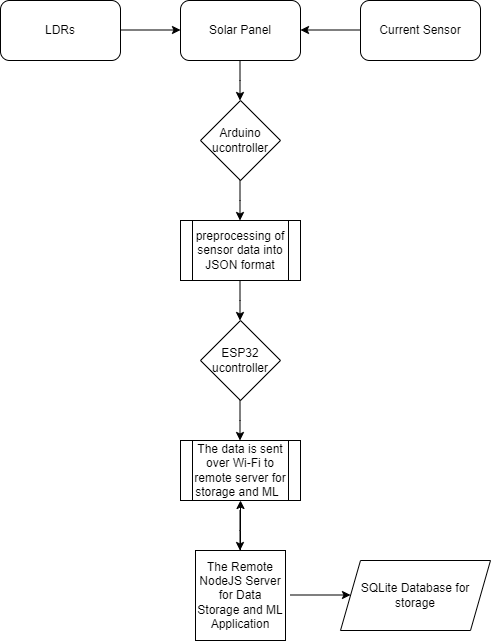

# Code Working

In [1]:
import pandas as pd
# Corrected Raw URL
url = 'https://raw.githubusercontent.com/Hammad-Khan-aka-Ansar-Malik/AI-Project/main/AI%20Project/db1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(url)
# Display the DataFrame
df.head()


,top,bottom,middle,left,right,current
0,0,368,0,14,0,0.22
1,0,398,0,17,0,0.12
2,0,400,0,17,0,0.32
3,0,399,0,18,0,0.32
4,0,398,0,17,0,0.22


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df

,top,bottom,middle,left,right,current
0,0,368,0,14,0,0.22
1,0,398,0,17,0,0.12
2,0,400,0,17,0,0.32
3,0,399,0,18,0,0.32
4,0,398,0,17,0,0.22
...,...,...,...,...,...,...
60,0,380,0,15,0,0.17
61,0,375,0,12,0,0.17
62,0,361,0,12,0,0.27
63,0,325,0,11,0,0.27


In [4]:
df.describe()

,top,bottom,middle,left,right,current
count,65.0,65.000000,65.0,65.000000,65.0,65.000000
mean,0.0,384.046154,0.0,15.215385,0.0,0.240462
std,0.0,32.867837,0.0,2.718526,0.0,0.096460
min,0.0,288.000000,0.0,8.000000,0.0,0.020000
25%,0.0,377.000000,0.0,14.000000,0.0,0.170000
50%,0.0,389.000000,0.0,16.000000,0.0,0.270000
75%,0.0,396.000000,0.0,17.000000,0.0,0.320000
max,0.0,473.000000,0.0,21.000000,0.0,0.460000


In [5]:
start_time = '07:00:00'
date_range = pd.date_range(start=start_time, periods=len(df), freq='15T')  # 15T means 15 minutes

# Add the timestamps to the DataFrame
df['timestamp'] = date_range

# Display the DataFrame
print(df)

    top  bottom  middle  left  right  current           timestamp
0     0     368       0    14      0     0.22 2024-01-01 07:00:00
1     0     398       0    17      0     0.12 2024-01-01 07:15:00
2     0     400       0    17      0     0.32 2024-01-01 07:30:00
3     0     399       0    18      0     0.32 2024-01-01 07:45:00
4     0     398       0    17      0     0.22 2024-01-01 08:00:00
..  ...     ...     ...   ...    ...      ...                 ...
60    0     380       0    15      0     0.17 2024-01-01 22:00:00
61    0     375       0    12      0     0.17 2024-01-01 22:15:00
62    0     361       0    12      0     0.27 2024-01-01 22:30:00
63    0     325       0    11      0     0.27 2024-01-01 22:45:00
64    0     324       0    11      0     0.17 2024-01-01 23:00:00

[65 rows x 7 columns]


In [7]:
current =df['current']
voltage = (current * 0.185) + 2.5
df['voltage'] = (current * 0.185) + 2.5
df

,top,bottom,middle,left,right,current,timestamp,voltage
0,0,368,0,14,0,0.22,2024-01-01 07:00:00,2.54070
1,0,398,0,17,0,0.12,2024-01-01 07:15:00,2.52220
2,0,400,0,17,0,0.32,2024-01-01 07:30:00,2.55920
3,0,399,0,18,0,0.32,2024-01-01 07:45:00,2.55920
4,0,398,0,17,0,0.22,2024-01-01 08:00:00,2.54070
...,...,...,...,...,...,...,...,...
60,0,380,0,15,0,0.17,2024-01-01 22:00:00,2.53145
61,0,375,0,12,0,0.17,2024-01-01 22:15:00,2.53145
62,0,361,0,12,0,0.27,2024-01-01 22:30:00,2.54995
63,0,325,0,11,0,0.27,2024-01-01 22:45:00,2.54995


In [8]:
df['power'] = current * voltage
df

,top,bottom,middle,left,right,current,timestamp,voltage,power
0,0,368,0,14,0,0.22,2024-01-01 07:00:00,2.54070,0.558954
1,0,398,0,17,0,0.12,2024-01-01 07:15:00,2.52220,0.302664
2,0,400,0,17,0,0.32,2024-01-01 07:30:00,2.55920,0.818944
3,0,399,0,18,0,0.32,2024-01-01 07:45:00,2.55920,0.818944
4,0,398,0,17,0,0.22,2024-01-01 08:00:00,2.54070,0.558954
...,...,...,...,...,...,...,...,...,...
60,0,380,0,15,0,0.17,2024-01-01 22:00:00,2.53145,0.430347
61,0,375,0,12,0,0.17,2024-01-01 22:15:00,2.53145,0.430347
62,0,361,0,12,0,0.27,2024-01-01 22:30:00,2.54995,0.688487
63,0,325,0,11,0,0.27,2024-01-01 22:45:00,2.54995,0.688487


In [9]:
df['panel_voltage'] = 18
df['panel_power'] = current * 18
df

,top,bottom,middle,left,right,current,timestamp,voltage,power,panel_voltage,panel_power
0,0,368,0,14,0,0.22,2024-01-01 07:00:00,2.54070,0.558954,18,3.96
1,0,398,0,17,0,0.12,2024-01-01 07:15:00,2.52220,0.302664,18,2.16
2,0,400,0,17,0,0.32,2024-01-01 07:30:00,2.55920,0.818944,18,5.76
3,0,399,0,18,0,0.32,2024-01-01 07:45:00,2.55920,0.818944,18,5.76
4,0,398,0,17,0,0.22,2024-01-01 08:00:00,2.54070,0.558954,18,3.96
...,...,...,...,...,...,...,...,...,...,...,...
60,0,380,0,15,0,0.17,2024-01-01 22:00:00,2.53145,0.430347,18,3.06
61,0,375,0,12,0,0.17,2024-01-01 22:15:00,2.53145,0.430347,18,3.06
62,0,361,0,12,0,0.27,2024-01-01 22:30:00,2.54995,0.688487,18,4.86
63,0,325,0,11,0,0.27,2024-01-01 22:45:00,2.54995,0.688487,18,4.86


In [10]:
panel_power = df['panel_power']
power = df['power']
df['power_efficiency'] = (power/panel_power) *100 #output/input
df['solar_efficiency'] = (panel_power/1411)*100
df

,top,bottom,middle,left,right,current,timestamp,voltage,power,panel_voltage,panel_power,power_efficiency,solar_efficiency
0,0,368,0,14,0,0.22,2024-01-01 07:00:00,2.54070,0.558954,18,3.96,14.115000,0.280652
1,0,398,0,17,0,0.12,2024-01-01 07:15:00,2.52220,0.302664,18,2.16,14.012222,0.153083
2,0,400,0,17,0,0.32,2024-01-01 07:30:00,2.55920,0.818944,18,5.76,14.217778,0.408221
3,0,399,0,18,0,0.32,2024-01-01 07:45:00,2.55920,0.818944,18,5.76,14.217778,0.408221
4,0,398,0,17,0,0.22,2024-01-01 08:00:00,2.54070,0.558954,18,3.96,14.115000,0.280652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,380,0,15,0,0.17,2024-01-01 22:00:00,2.53145,0.430347,18,3.06,14.063611,0.216867
61,0,375,0,12,0,0.17,2024-01-01 22:15:00,2.53145,0.430347,18,3.06,14.063611,0.216867
62,0,361,0,12,0,0.27,2024-01-01 22:30:00,2.54995,0.688487,18,4.86,14.166389,0.344437
63,0,325,0,11,0,0.27,2024-01-01 22:45:00,2.54995,0.688487,18,4.86,14.166389,0.344437


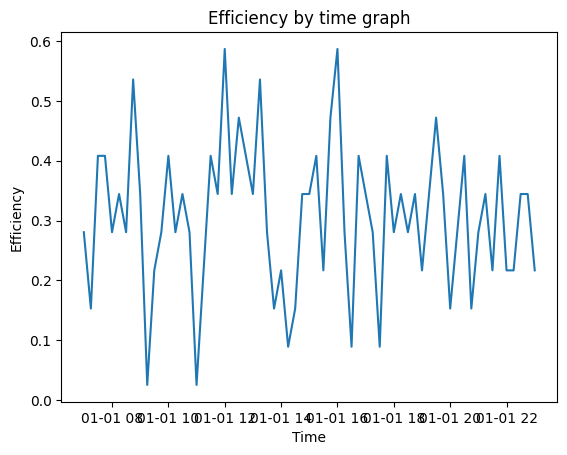

In [11]:
x= df.timestamp
y = df.solar_efficiency
plt.plot(x,y)#, height = df.solar_efficiency)
plt.xlabel("Time")
plt.ylabel("Efficiency")
plt.title("Efficiency by time graph")
plt.show()

In [12]:
df = df.ffill()

X = df.drop("timestamp",axis = "columns")
Y = df.drop("solar_efficiency", axis = "columns")
print("shape of X =", X.shape)
print("Shape of Y= ", Y.shape)

shape of X = (65, 12)
Shape of Y=  (65, 12)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=51)
print( X_train.shape)
print(Y_train.shape)
print( X_test.shape)
print( X_test.shape)

(52, 12)
(52, 12)
(13, 12)
(13, 12)


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   top               65 non-null     int64  
 1   bottom            65 non-null     int64  
 2   middle            65 non-null     int64  
 3   left              65 non-null     int64  
 4   right             65 non-null     int64  
 5   current           65 non-null     float64
 6   voltage           65 non-null     float64
 7   power             65 non-null     float64
 8   panel_voltage     65 non-null     int64  
 9   panel_power       65 non-null     float64
 10  power_efficiency  65 non-null     float64
 11  solar_efficiency  65 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 6.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            ----

In [17]:
X1 = df.solar_efficiency
X1_train = df['solar_efficiency']
Y1 = df.timestamp
Y1_train = df['timestamp']

In [26]:
X2 = df[['timestamp', 'solar_efficiency']].copy()
X2

,timestamp,solar_efficiency
0,2024-01-01 07:00:00,0.280652
1,2024-01-01 07:15:00,0.153083
2,2024-01-01 07:30:00,0.408221
3,2024-01-01 07:45:00,0.408221
4,2024-01-01 08:00:00,0.280652
...,...,...
60,2024-01-01 22:00:00,0.216867
61,2024-01-01 22:15:00,0.216867
62,2024-01-01 22:30:00,0.344437
63,2024-01-01 22:45:00,0.344437


In [27]:
X2['hour'] = X2['timestamp'].dt.hour
X2['minute'] = X2['timestamp'].dt.minute

X2['minute']

0      0
1     15
2     30
3     45
4      0
      ..
60     0
61    15
62    30
63    45
64     0
Name: minute, Length: 65, dtype: int64

In [28]:
X2 = X2.drop('timestamp', axis=1)
X2

,solar_efficiency,hour,minute
0,0.280652,7,0
1,0.153083,7,15
2,0.408221,7,30
3,0.408221,7,45
4,0.280652,8,0
...,...,...,...
60,0.216867,22,0
61,0.216867,22,15
62,0.344437,22,30
63,0.344437,22,45


In [29]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)


In [30]:
lr.fit(X2_train, Y2_train)

LinearRegression()

In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hours and minutes into separate columns
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

df

,top,bottom,middle,left,right,current,timestamp,voltage,power,panel_voltage,panel_power,power_efficiency,solar_efficiency,hour,minute
0,0,368,0,14,0,0.22,2024-01-01 07:00:00,2.54070,0.558954,18,3.96,14.115000,0.280652,7,0
1,0,398,0,17,0,0.12,2024-01-01 07:15:00,2.52220,0.302664,18,2.16,14.012222,0.153083,7,15
2,0,400,0,17,0,0.32,2024-01-01 07:30:00,2.55920,0.818944,18,5.76,14.217778,0.408221,7,30
3,0,399,0,18,0,0.32,2024-01-01 07:45:00,2.55920,0.818944,18,5.76,14.217778,0.408221,7,45
4,0,398,0,17,0,0.22,2024-01-01 08:00:00,2.54070,0.558954,18,3.96,14.115000,0.280652,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,380,0,15,0,0.17,2024-01-01 22:00:00,2.53145,0.430347,18,3.06,14.063611,0.216867,22,0
61,0,375,0,12,0,0.17,2024-01-01 22:15:00,2.53145,0.430347,18,3.06,14.063611,0.216867,22,15
62,0,361,0,12,0,0.27,2024-01-01 22:30:00,2.54995,0.688487,18,4.86,14.166389,0.344437,22,30
63,0,325,0,11,0,0.27,2024-01-01 22:45:00,2.54995,0.688487,18,4.86,14.166389,0.344437,22,45


In [33]:
df['time_float']= df.hour + (0.01*df.minute)
df

,top,bottom,middle,left,right,current,timestamp,voltage,power,panel_voltage,panel_power,power_efficiency,solar_efficiency,hour,minute,time_float
0,0,368,0,14,0,0.22,2024-01-01 07:00:00,2.54070,0.558954,18,3.96,14.115000,0.280652,7,0,7.00
1,0,398,0,17,0,0.12,2024-01-01 07:15:00,2.52220,0.302664,18,2.16,14.012222,0.153083,7,15,7.15
2,0,400,0,17,0,0.32,2024-01-01 07:30:00,2.55920,0.818944,18,5.76,14.217778,0.408221,7,30,7.30
3,0,399,0,18,0,0.32,2024-01-01 07:45:00,2.55920,0.818944,18,5.76,14.217778,0.408221,7,45,7.45
4,0,398,0,17,0,0.22,2024-01-01 08:00:00,2.54070,0.558954,18,3.96,14.115000,0.280652,8,0,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,380,0,15,0,0.17,2024-01-01 22:00:00,2.53145,0.430347,18,3.06,14.063611,0.216867,22,0,22.00
61,0,375,0,12,0,0.17,2024-01-01 22:15:00,2.53145,0.430347,18,3.06,14.063611,0.216867,22,15,22.15
62,0,361,0,12,0,0.27,2024-01-01 22:30:00,2.54995,0.688487,18,4.86,14.166389,0.344437,22,30,22.30
63,0,325,0,11,0,0.27,2024-01-01 22:45:00,2.54995,0.688487,18,4.86,14.166389,0.344437,22,45,22.45


In [34]:
X2['time_float']= X2.hour + (0.01*X2.minute)
X2

,solar_efficiency,hour,minute,time_float
0,0.280652,7,0,7.00
1,0.153083,7,15,7.15
2,0.408221,7,30,7.30
3,0.408221,7,45,7.45
4,0.280652,8,0,8.00
...,...,...,...,...
60,0.216867,22,0,22.00
61,0.216867,22,15,22.15
62,0.344437,22,30,22.30
63,0.344437,22,45,22.45


In [35]:
X3 = df.time_float
Y3 = df.solar_efficiency
x4=pd.DataFrame(X3)
y4=pd.DataFrame(Y3)
print("shape of X =", x4.shape)
print("Shape of Y= ", y4.shape)

shape of X = (65, 1)
Shape of Y=  (65, 1)


In [36]:
X3

0      7.00
1      7.15
2      7.30
3      7.45
4      8.00
      ...  
60    22.00
61    22.15
62    22.30
63    22.45
64    23.00
Name: time_float, Length: 65, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test= train_test_split(x4,y4,test_size=0.2,random_state=7)
print('shape of x_train=', X3_train.shape)
print('shape of y_train=', Y3_train.shape)
print('shape of x_test=', X3_test.shape)
print('shape of x_test=', Y3_test.shape)

shape of x_train= (52, 1)
shape of y_train= (52, 1)
shape of x_test= (13, 1)
shape of x_test= (13, 1)


In [39]:
lr.fit(X3_train, Y3_train)

LinearRegression()

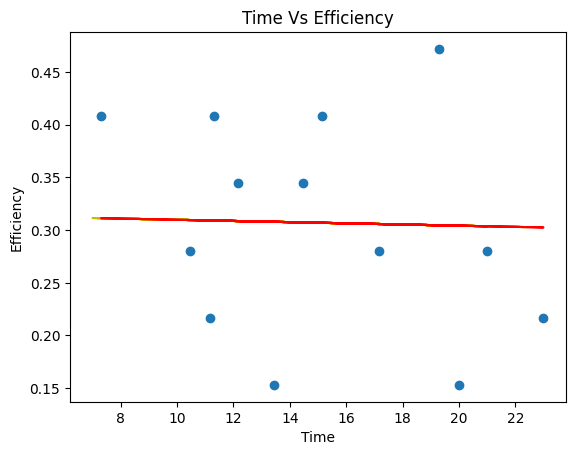

In [40]:
plt.scatter(X3_test,Y3_test)
plt.plot(X3_train,lr.predict(X3_train),color='y')
plt.plot(X3_test, lr.predict(X3_test), color = 'r')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.title('Time Vs Efficiency')
plt.show()

In [41]:
prd_new = float(input("Enter time :"))
lr.predict([[prd_new]])

Enter time :15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.30703443]])

#Working Code on Big Sample of Data

In [42]:
url_1 = 'https://raw.githubusercontent.com/Hammad-Khan-aka-Ansar-Malik/AI-Project/main/AI%20Project/server_db_3.csv'
df_2 = pd.read_csv(url_1)
df_2.head()

,top,left,middle,bottom,right,current
0,581,581,628,679,549,0.46
1,580,580,628,679,549,0.51
2,577,577,628,679,548,0.56
3,575,575,628,679,548,0.46
4,572,572,628,679,548,0.42


In [43]:
df_2.info

<bound method DataFrame.info of      top left  middle bottom  right  current
0    581  581     628    679    549     0.46
1    580  580     628    679    549     0.51
2    577  577     628    679    548     0.56
3    575  575     628    679    548     0.46
4    572  572     628    679    548     0.42
..   ...  ...     ...    ...    ...      ...
714  596  594     595    681    617     0.66
715  594  594     595    682    618     0.46
716  607  608     681    595    620     0.46
717  594  594     595    681    619     0.51
718  594  594     595    681    618     0.61

[719 rows x 6 columns]>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
current_1 =df_2['current']
voltage_1 = (current_1 * 0.185) + 2.5
df_2['panel_voltage'] = 18
df_2['voltage'] = (current_1 * 0.185) + 2.5
df_2

,top,left,middle,bottom,right,current,panel_voltage,voltage
0,581,581,628,679,549,0.46,18,2.58510
1,580,580,628,679,549,0.51,18,2.59435
2,577,577,628,679,548,0.56,18,2.60360
3,575,575,628,679,548,0.46,18,2.58510
4,572,572,628,679,548,0.42,18,2.57770
...,...,...,...,...,...,...,...,...
714,596,594,595,681,617,0.66,18,2.62210
715,594,594,595,682,618,0.46,18,2.58510
716,607,608,681,595,620,0.46,18,2.58510
717,594,594,595,681,619,0.51,18,2.59435


In [46]:
df_2['power'] = current_1 * voltage_1
df_2['panel_power'] = current_1 * 18
df_2

,top,left,middle,bottom,right,current,panel_voltage,voltage,power,panel_power
0,581,581,628,679,549,0.46,18,2.58510,1.189146,8.28
1,580,580,628,679,549,0.51,18,2.59435,1.323119,9.18
2,577,577,628,679,548,0.56,18,2.60360,1.458016,10.08
3,575,575,628,679,548,0.46,18,2.58510,1.189146,8.28
4,572,572,628,679,548,0.42,18,2.57770,1.082634,7.56
...,...,...,...,...,...,...,...,...,...,...
714,596,594,595,681,617,0.66,18,2.62210,1.730586,11.88
715,594,594,595,682,618,0.46,18,2.58510,1.189146,8.28
716,607,608,681,595,620,0.46,18,2.58510,1.189146,8.28
717,594,594,595,681,619,0.51,18,2.59435,1.323119,9.18


In [47]:
panel_power_1 = df_2['panel_power']
power_1 = df_2['power']
df_2['power_efficiency'] = (power_1/panel_power_1) *100 #output/input
df_2['solar_efficiency'] = (panel_power_1/1411)*100
df_2

,top,left,middle,bottom,right,current,panel_voltage,voltage,power,panel_power,power_efficiency,solar_efficiency
0,581,581,628,679,549,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818
1,580,580,628,679,549,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602
2,577,577,628,679,548,0.56,18,2.60360,1.458016,10.08,14.464444,0.714387
3,575,575,628,679,548,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818
4,572,572,628,679,548,0.42,18,2.57770,1.082634,7.56,14.320556,0.535790
...,...,...,...,...,...,...,...,...,...,...,...,...
714,596,594,595,681,617,0.66,18,2.62210,1.730586,11.88,14.567222,0.841956
715,594,594,595,682,618,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818
716,607,608,681,595,620,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818
717,594,594,595,681,619,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602


In [48]:
date_range_1 = pd.date_range(start=start_time, periods=len(df_2), freq='15S')
time_only = date_range_1.time
df_2['timestamp'] = time_only
df_2

,top,left,middle,bottom,right,current,panel_voltage,voltage,power,panel_power,power_efficiency,solar_efficiency,timestamp
0,581,581,628,679,549,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,07:00:00
1,580,580,628,679,549,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602,07:00:15
2,577,577,628,679,548,0.56,18,2.60360,1.458016,10.08,14.464444,0.714387,07:00:30
3,575,575,628,679,548,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,07:00:45
4,572,572,628,679,548,0.42,18,2.57770,1.082634,7.56,14.320556,0.535790,07:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,596,594,595,681,617,0.66,18,2.62210,1.730586,11.88,14.567222,0.841956,09:58:30
715,594,594,595,682,618,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,09:58:45
716,607,608,681,595,620,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,09:59:00
717,594,594,595,681,619,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602,09:59:15


In [49]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   top               719 non-null    int64  
 1   left              719 non-null    object 
 2   middle            719 non-null    int64  
 3   bottom            719 non-null    object 
 4   right             719 non-null    int64  
 5   current           719 non-null    float64
 6   panel_voltage     719 non-null    int64  
 7   voltage           719 non-null    float64
 8   power             719 non-null    float64
 9   panel_power       719 non-null    float64
 10  power_efficiency  719 non-null    float64
 11  solar_efficiency  719 non-null    float64
 12  timestamp         719 non-null    object 
dtypes: float64(6), int64(4), object(3)
memory usage: 73.1+ KB


In [50]:
df_2.describe()

,top,middle,right,current,panel_voltage,voltage,power,panel_power,power_efficiency,solar_efficiency
count,719.000000,719.000000,719.000000,719.000000,719.0,719.000000,719.000000,719.000000,719.000000,719.000000
mean,589.835883,633.173853,589.140473,0.799152,18.0,2.647843,2.118648,14.384729,14.710239,1.019471
std,66.354566,15.612708,27.350933,0.119088,0.0,0.022031,0.331389,2.143578,0.122396,0.151919
min,317.000000,595.000000,536.000000,0.270000,18.0,2.549950,0.688487,4.860000,14.166389,0.344437
25%,612.000000,628.000000,556.000000,0.760000,18.0,2.640600,2.006856,13.680000,14.670000,0.969525
50%,616.000000,640.000000,600.000000,0.760000,18.0,2.640600,2.006856,13.680000,14.670000,0.969525
75%,618.000000,642.000000,616.000000,0.900000,18.0,2.666500,2.399850,16.200000,14.813889,1.148122
max,632.000000,681.000000,632.000000,1.100000,18.0,2.703500,2.973850,19.800000,15.019444,1.403260


In [51]:
print(df_2['bottom'].dtype)  # It will be 'object'
# Convert 'object' dtype to 'float'
df_2['bottom'] = pd.to_numeric(df_2['bottom'], errors='coerce')
df_2['left'] = pd.to_numeric(df_2['left'], errors='coerce')

object


In [52]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   top               719 non-null    int64  
 1   left              718 non-null    float64
 2   middle            719 non-null    int64  
 3   bottom            718 non-null    float64
 4   right             719 non-null    int64  
 5   current           719 non-null    float64
 6   panel_voltage     719 non-null    int64  
 7   voltage           719 non-null    float64
 8   power             719 non-null    float64
 9   panel_power       719 non-null    float64
 10  power_efficiency  719 non-null    float64
 11  solar_efficiency  719 non-null    float64
 12  timestamp         719 non-null    object 
dtypes: float64(8), int64(4), object(1)
memory usage: 73.1+ KB


In [53]:
df_2

,top,left,middle,bottom,right,current,panel_voltage,voltage,power,panel_power,power_efficiency,solar_efficiency,timestamp
0,581,581.0,628,679.0,549,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,07:00:00
1,580,580.0,628,679.0,549,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602,07:00:15
2,577,577.0,628,679.0,548,0.56,18,2.60360,1.458016,10.08,14.464444,0.714387,07:00:30
3,575,575.0,628,679.0,548,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,07:00:45
4,572,572.0,628,679.0,548,0.42,18,2.57770,1.082634,7.56,14.320556,0.535790,07:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,596,594.0,595,681.0,617,0.66,18,2.62210,1.730586,11.88,14.567222,0.841956,09:58:30
715,594,594.0,595,682.0,618,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,09:58:45
716,607,608.0,681,595.0,620,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,09:59:00
717,594,594.0,595,681.0,619,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602,09:59:15


In [64]:
#df_2['time_float'] = df_2['timestamp'].dt.strftime('%H%M%S').astype(float)
df_2['time_column'] = pd.to_datetime(df_2['timestamp'], format='%H:%M:%S')
#df['time_float']= df.hour + (0.01*df.minute)
#df_2['time_float'] = df_2['time_column']/10000
# Extract the time component and convert it to float
df_2['time_float'] = df_2['time_column'].dt.strftime('%H%M%S').astype(float)


In [65]:
df_2['time_float'] = df_2['time_float']/10000

In [66]:
df_2

,top,left,middle,bottom,right,current,panel_voltage,voltage,power,panel_power,power_efficiency,solar_efficiency,timestamp,time_column,time_float
0,581,581.0,628,679.0,549,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,07:00:00,1900-01-01 07:00:00,7.0000
1,580,580.0,628,679.0,549,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602,07:00:15,1900-01-01 07:00:15,7.0015
2,577,577.0,628,679.0,548,0.56,18,2.60360,1.458016,10.08,14.464444,0.714387,07:00:30,1900-01-01 07:00:30,7.0030
3,575,575.0,628,679.0,548,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,07:00:45,1900-01-01 07:00:45,7.0045
4,572,572.0,628,679.0,548,0.42,18,2.57770,1.082634,7.56,14.320556,0.535790,07:01:00,1900-01-01 07:01:00,7.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,596,594.0,595,681.0,617,0.66,18,2.62210,1.730586,11.88,14.567222,0.841956,09:58:30,1900-01-01 09:58:30,9.5830
715,594,594.0,595,682.0,618,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,09:58:45,1900-01-01 09:58:45,9.5845
716,607,608.0,681,595.0,620,0.46,18,2.58510,1.189146,8.28,14.361667,0.586818,09:59:00,1900-01-01 09:59:00,9.5900
717,594,594.0,595,681.0,619,0.51,18,2.59435,1.323119,9.18,14.413056,0.650602,09:59:15,1900-01-01 09:59:15,9.5915


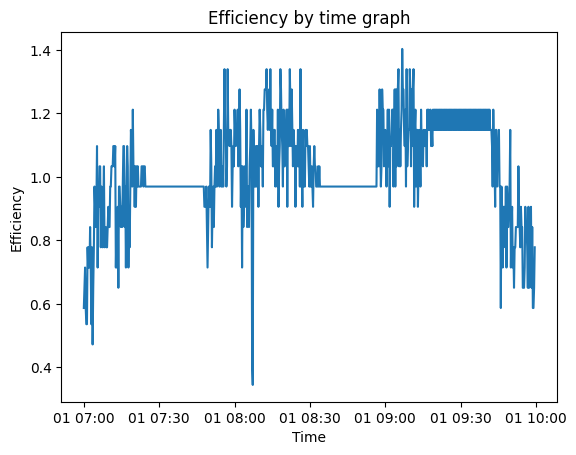

In [67]:
x1= df_2.time_column
y1= df_2.solar_efficiency
plt.plot(x1,y1)
plt.xlabel("Time")
plt.ylabel("Efficiency")
plt.title("Efficiency by time graph")
plt.show()

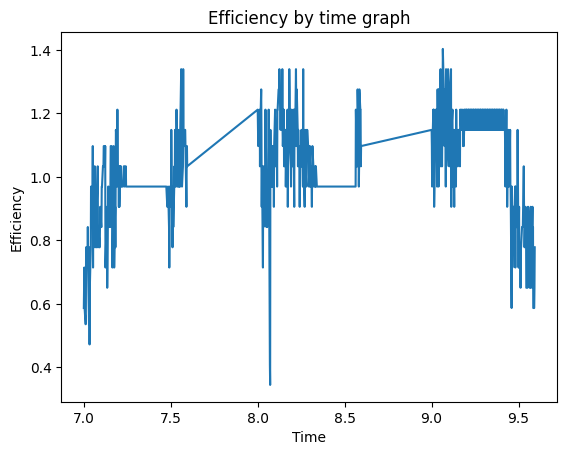

In [69]:
x1= df_2.time_float
y1= df_2.solar_efficiency
plt.plot(x1,y1)
plt.xlabel("Time")
plt.ylabel("Efficiency")
plt.title("Efficiency by time graph")
plt.show()

In [70]:
#df_2= df_2.drop('time_column', axis=1)
#df_2 = df_2.drop('time_float',axis =1)

In [72]:
Y_1 = df_2.solar_efficiency
#X_1_train = df_2['solar_efficiency']
X_1 = df_2.time_float
#Y_1_train = df_2['timefloat']
X_1=pd.DataFrame(X_1)
Y_1=pd.DataFrame(Y_1)
#lr.fit(X1_train['solar_efficiency'], Y1_train)
#lr.fit(X1_train[['solar_efficiency']], Y1_train)

#lr.fit(X1_train, Y1_train) #Reshaping error
X_1

,time_float
0,7.0000
1,7.0015
2,7.0030
3,7.0045
4,7.0100
...,...
714,9.5830
715,9.5845
716,9.5900
717,9.5915


In [73]:
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)
print(X_1_train.shape)
print(Y_1_train.shape)
print( X_1_test.shape)
print( X_1_test.shape)

(575, 1)
(575, 1)
(144, 1)
(144, 1)


In [74]:
lr.fit(X_1_train, Y_1_train)

LinearRegression()

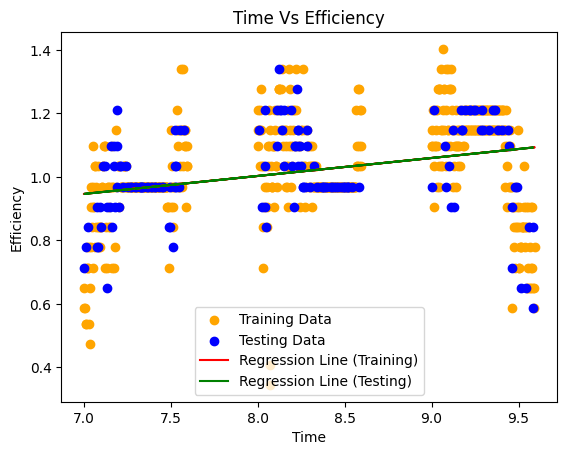

In [75]:
import matplotlib.pyplot as plt
plt.scatter(X_1_train, Y_1_train, label='Training Data', color='orange')
plt.scatter(X_1_test, Y_1_test, label='Testing Data', color='blue')
plt.plot(X_1_train, lr.predict(X_1_train), label='Regression Line (Training)', color='red')
plt.plot(X_1_test, lr.predict(X_1_test), label='Regression Line (Testing)', color='green')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.title('Time Vs Efficiency')

plt.legend()
plt.show()

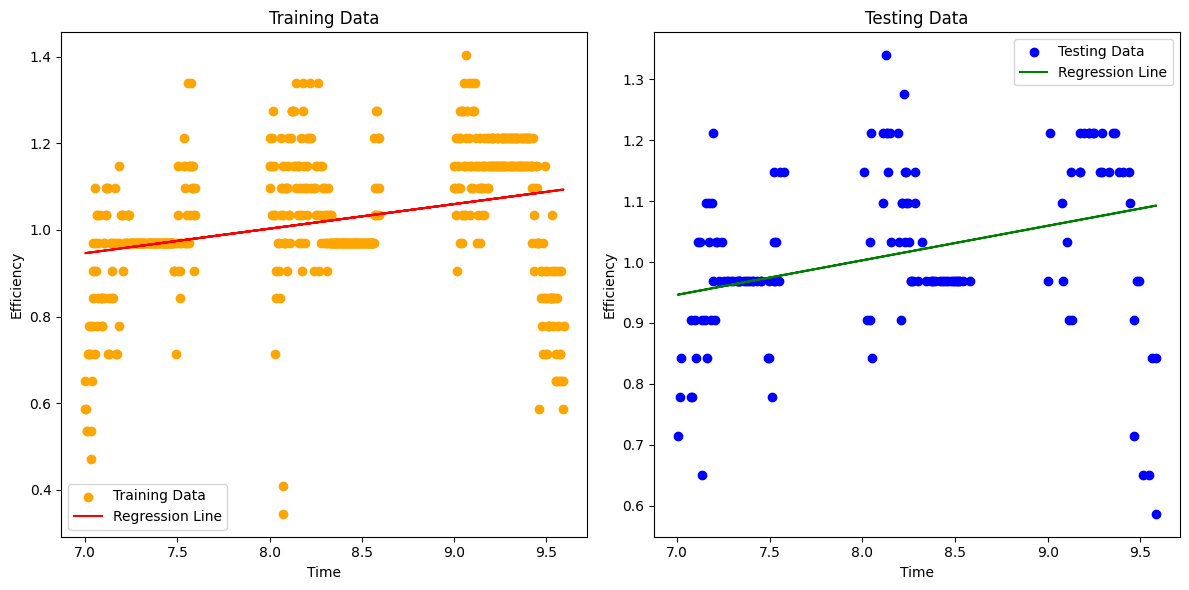

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(X_1_train, Y_1_train, label='Training Data', color='orange')
plt.plot(X_1_train, lr.predict(X_1_train), label='Regression Line', color='red')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.title('Training Data')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(X_1_test, Y_1_test, label='Testing Data', color='blue')
plt.plot(X_1_test, lr.predict(X_1_test), label='Regression Line', color='green')
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.title('Testing Data')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
prd_new = float(input("Enter time :"))
lr.predict([[prd_new]])

Enter time :8.75


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.04541573]])